Part (c)
Q: Why is the background just beyond the edge of the flower quite dark in the enhanced image?
A: This is due to the alpha masking picking up the black pixels beyond the boundaries of the actual foreground image (flower) and blending that into the final image


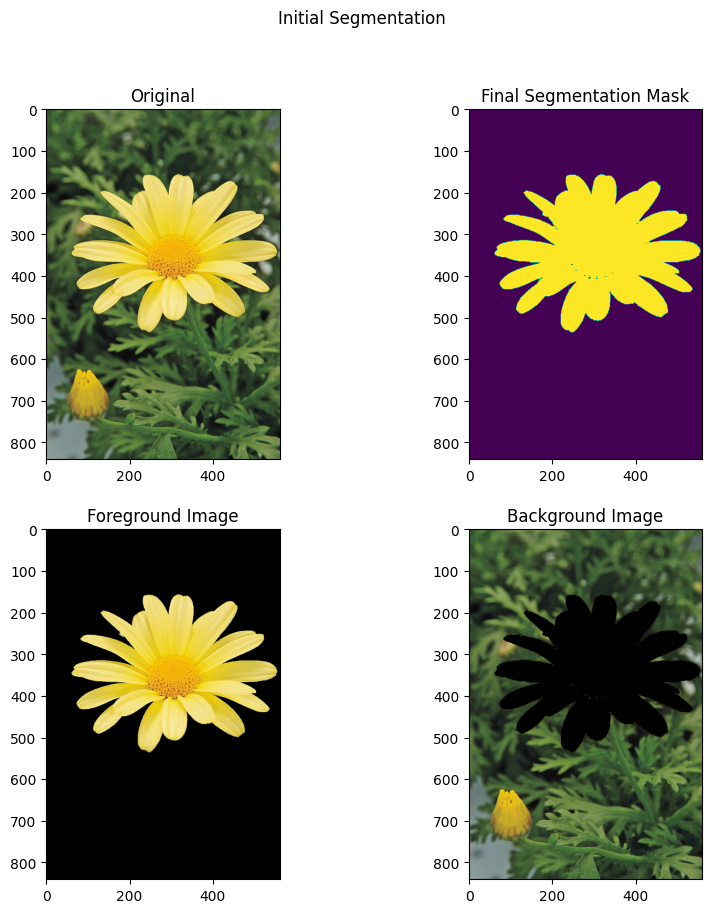

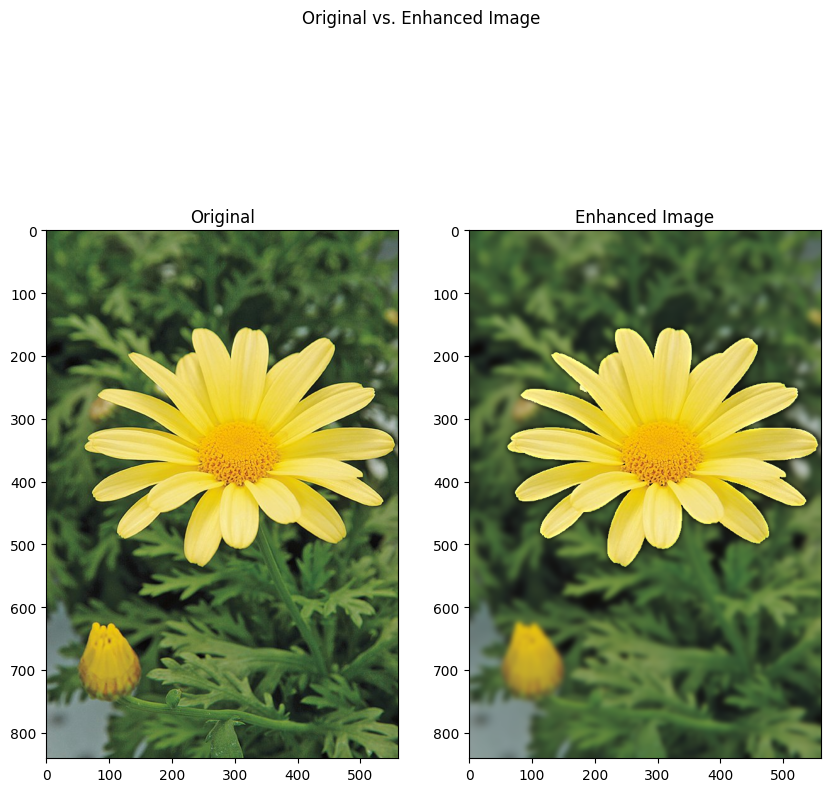

In [19]:
#Question 8 - Background Blurring

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reads the image
im = cv.imread('images/daisy.jpg')
assert im is not None
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)

#Part (a) - Image Segmentation
mask = np.zeros(im.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (58, 154, 498, 466)
cv.grabCut(im,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
mask3 = np.where((mask==2)|(mask==0),1,0).astype('uint8')
im_f = im*mask2[:,:,np.newaxis]
im_b = im*mask3[:,:,np.newaxis]

#Part (b) - Blurring
k = 23
blur_bg = cv.GaussianBlur(im_b, (k,k), 0)
def superimpose(bg, fg, position):
    # Get the dimensions of the foreground image
    fg_height, fg_width = fg.shape[:2]
    
    # Extract the position coordinates
    x, y = position
    if x < 0 or y < 0 or x + fg_width > bg.shape[1] or y + fg_height > bg.shape[0]:
        raise ValueError("Foreground image exceeds the boundaries of the background image.")
    roi = bg[y:y+fg_height, x:x+fg_width]
    fg_mask = cv.cvtColor(cv.bitwise_not(cv.cvtColor(fg, cv.COLOR_BGR2GRAY)), cv.COLOR_GRAY2BGR)
    superimposed_image = cv.addWeighted(roi, 1, fg, 1, 0)
    bg[y:y+fg_height, x:x+fg_width] = superimposed_image
    
    return bg

enhanced = superimpose(blur_bg, im_f, (0,0))

#Part (c) 
print("Part (c)")
print("Q: Why is the background just beyond the edge of the flower quite dark in the enhanced image?")
print("A: This is due to the alpha masking picking up the black pixels beyond the boundaries of the actual foreground image (flower) and blending that into the final image")

fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0 , 0].imshow(im)
ax[0 , 0].set_title('Original')
ax[0 , 1].imshow(mask2)
ax[0 , 1].set_title('Final Segmentation Mask')
ax[1 , 0].imshow(im_f)
ax[1 , 0].set_title('Foreground Image')
ax[1 , 1].imshow(im_b)
ax[1 , 1].set_title('Background Image')
fig.suptitle('Initial Segmentation')
plt.show()

fig2, ax2 = plt.subplots(1,2, figsize = (10,10))
ax2[0].imshow(im)
ax2[0].set_title('Original')
ax2[1].imshow(enhanced)
ax2[1].set_title('Enhanced Image')
fig2.suptitle('Original vs. Enhanced Image')
plt.show()